Steps in Data Preprocessing in Machine Learning
1. Import all the crucial libraries
2. Import the dataset
3. Identifying and handling the missing values
4. Correct dataframe
5. Scaling Data
6. Encoding the categorical data
7. Detect and Handling Outliers
8. Discretizating Features
9. Deal with Imbalance Data(Methods for Dealing with Imbalanced Data.ipynb)

# 1-Import libraries

In [25]:
import pandas as pd
import numpy as np

# 2-Import the dataset

In [26]:
 filename = 'imports-85.data'

In [27]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [28]:
df = pd.read_csv(filename,names=headers)
print("Done")

Done


In [29]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# 3-Handling Missing Values

In [30]:
#Identifying and handling the missing values
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


How to work with missing data?

Steps for working with missing data:

1-identify missing data   

2-deal with missing data     

How to deal with missing data?

1. drop data 
    a. drop the whole row
    b. drop the whole column
2. replace data
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions
3.Impute miss value 

In [31]:
#Count missing values in each column
np.sum(df.isna())  #No missing value

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [55]:
features = list(df.columns[1:])
#https://towardsdatascience.com/3-feature-selection-techniques-of-scikit-learn-c9a5f7eb7364
#df.var()

In [39]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [40]:
#replace by mean
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)

In [41]:
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

In [42]:
avg_2=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_2, inplace= True)

In [43]:
avg_2=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_2, inplace= True)

In [44]:
avg_2=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_2, inplace= True)

In [45]:
avg_2=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_2, inplace= True)

In [46]:
#replace by frequent
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [47]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [48]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [49]:
#Impute miss value with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['peak-rpm']])
df['peak-rpm'] = imputer.transform(df[['peak-rpm']])

In [50]:
np.sum(df.isna())  #No missing value

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now, we obtain the dataset with no missing values.

# 4-Correct data format

In [51]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [52]:
#Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
print("Done")

Done


# 5-Encoding Nominal Categorical Features

#1- Oridinal Encoder
#2-Dummy Encoding,using the Pandas function get_dummies, 
#3-Label Encoding:. In this technique, each label is assigned a unique integer based on alphabetical ordering.
#4-One-Hot Encoding:One-Hot Encoding is the process of creating dummy variables.in the scikitlearn framework(can introduce collinearity).

## Encoding Ordinal Categorical Features

In [ ]:
# Create features
dataframe = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})
# Create mapper
scale_mapper = {"Low":1, "Medium":2, "High":3}
# Replace feature values with scale
dataframe["Score"].replace(scale_mapper)

In [56]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(df['num-of-cylinders'].values.reshape(-1,1))


When to use a Label Encoding vs. One Hot Encoding
We apply One-Hot Encoding when:

#The categorical feature is not ordinal (like the countries above)
#The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

#The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)

#The number of categories is quite large as one-hot encoding can lead to high memory consumption

## Lable Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['make'])
df['make'] = enc.transform(df['make'])

## Dummy Encoding

In [11]:
dummy_var = ['body-style']
final_data = pd.get_dummies(df,columns=dummy_var,drop_first=True)

In [14]:
#droping the last column 
df= df.drop(['body-style'], axis=1) 
#printing to verify 
df=final_data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    object 
 2   make                  205 non-null    int32  
 3   fuel-type             205 non-null    object 
 4   aspiration            205 non-null    object 
 5   num-of-doors          205 non-null    object 
 6   drive-wheels          205 non-null    object 
 7   engine-location       205 non-null    object 
 8   wheel-base            205 non-null    float64
 9   length                205 non-null    float64
 10  width                 205 non-null    float64
 11  height                205 non-null    float64
 12  curb-weight           205 non-null    int64  
 13  engine-type           205 non-null    object 
 14  num-of-cylinders      205 non-null    object 
 15  engine-size           2

## Numbers Can Encode Categoricals

In [3]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [4]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [5]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [6]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [7]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


In [ ]:
# این خطوط اجرا نمیشه چون دیتاستش نیست
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [ ]:
# این خطوط اجرا نمیشه چون دیتاستش نیست
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

In [ ]:
# این خطوط اجرا نمیشه چون دیتاستش نیست
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

# 6-Rescaling a Feature 
this point blongs to Numeric Feature.
#Sandard Scaling
#MinMaxScaling
#Standardizing
#Normalizing

Rescaling a feature rescale the values of a numerical feature to be between two values.

## Sandard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X)

## MinMaxScaling

In [ ]:
MinMaxScaler from sklearn import preprocessing

#Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

#Scale feature 
scaled_feature = minmax_scale.fit_transform(feature)

## Standardizing a Feature

---Standardizing a feature You want to transform a feature to have a mean of 0 and a standard deviation of 1.

In [ ]:
#Create scaler 
scaler = preprocessing.StandardScaler()

#Transform the feature 
standardized = scaler.fit_transform(x)
print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

In [ ]:
#RobustScaler, which works similarly to the Standard one but uses the median and the quantiles,
#instead of the mean and variance: this is definitely useful when one has (or suspect to have) outliers

#2--Create scaler
robust_scaler = preprocessing.RobustScaler()
#Transform feature
robust_scaler.fit_transform(x)

## Normalizing Observations

In [ ]:
----Normalizing 
You want to rescale the feature values of observations to have unit norm (the sum of their
lengths is 1.normalize each feature vector so that it has a L2-norm equal to one

In [ ]:
# Load libraries
import numpy as np
from sklearn.preprocessing import Normalizer
# Create feature matrix
features = np.array([[0.5, 0.5],[1.1, 3.4],[1.5, 20.2],[1.63, 34.4],[10.9, 3.3]])
#Create normalizer
normalizer = Normalizer(norm="l2")
#Transform feature matrix
normalizer.transform(features)

#l2:Euclidean
#l1:Manhattan norm

# 7-Detecting and handle Outliers

 Detecting Outliers
IQR:
handling outlier:
1)drop them
2)we can mark them as outliers and include it as a feature

houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)

3)transform the feature to dampen the effect of the outlier؟؟؟؟؟؟؟

(array([ 9.,  7., 20., 17., 16., 12., 10., 11.,  6.,  7.,  6.,  5.,  8.,
         4.,  2.,  6.,  7.,  8.,  3.,  7.,  4.,  1.,  0.,  2.,  1.,  2.,
         1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         1.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5118.        ,  5789.36666667,  6460.73333333,  7132.1       ,
         7803.46666667,  8474.83333333,  9146.2       ,  9817.56666667,
        10488.93333333, 11160.3       , 11831.66666667, 12503.03333333,
        13174.4       , 13845.76666667, 14517.13333333, 15188.5       ,
        15859.86666667, 16531.23333333, 17202.6       , 17873.96666667,
        18545.33333333, 19216.7       , 19888.06666667, 20559.43333333,
        21230.8       , 21902.16666667, 22573.53333333, 23244.9       ,
        23916.26666667, 24587.63333333, 25259.        , 25930.36666667,
        26601.73333333, 27273.1       , 27944.46666667, 28615.83333333,
        29

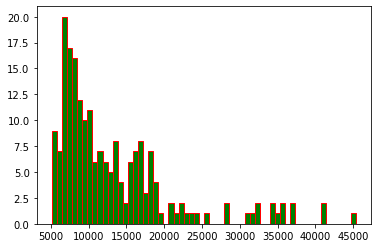

In [35]:
plt.hist(df['price'],60, facecolor='g',edgecolor="r")

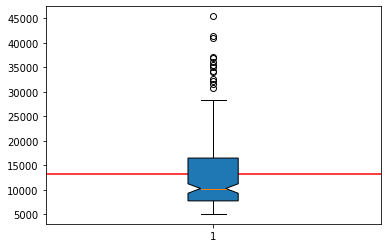

In [39]:
plt.boxplot(df['price'],notch=True, patch_artist=True)
plt.axhline(np.mean(df['price']),color='red')# Add mean to plot

In [14]:
#IQR:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [30]:
outliers_iqr(df['price'])

(array([ 14,  15,  16,  44,  45,  46,  67,  68,  69,  70,  71, 123, 124,
        125], dtype=int64),)

# 8-Discretizating Features

In [ ]:
---Discretizating Features
You have a numerical feature and want to break it up into discrete bins.
1)we can binarize the feature according to some threshold:
#Create feature
age = np.array([[6],[12],[20],[36],[65]])
#Create binarizer
binarizer = Binarizer(18)
#Transform feature
binarizer.fit_transform(age)
array([[0],[0],[1],[1], [1]])
2)we can break up numerical features according to multiple thresholds:
#Bin feature
np.digitize(age, bins=[20,30,64], right=True)
array([[0],[0],[0],[2],[3]])

In [43]:
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 132, 121, 146, 171,
       161, 141, 173, 145], dtype=int64)

In [46]:
np.digitize(df['engine-size'], bins=[120,150,180],right=True)

array([1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1], dtype=int64)

In [ ]:
#save file
df.to_csv('modified_imports-85.csv')